# 03. 딥러닝 기초 - PyTorch 소개 및 Tensor 기초

## 학습 목표
- PyTorch 프레임워크의 특징과 장점 이해
- Tensor의 개념과 다양한 생성 방법 학습
- Tensor 연산 및 Shape 변경 방법 익히기
- GPU 사용법 및 Autograd 개념 이해
- 간단한 선형 회귀 모델 구현

## 실습 순서
1. PyTorch 소개 및 설치 확인
2. Tensor 생성하기
3. Tensor 연산
4. GPU 사용하기
5. Autograd: 자동 미분
6. 실습: 선형 회귀 모델

---
## 1. PyTorch 소개 및 설치 확인

### PyTorch란?

PyTorch는 Facebook AI Research에서 만든 딥러닝 프레임워크입니다.

| 특징 | 설명 |
|------|------|
| **쉽다** | Python과 비슷한 문법 |
| **유연하다** | 동적 계산 그래프 (Define-by-Run) |
| **빠르다** | GPU 가속 지원 |
| **자동 미분** | Autograd로 자동 기울기 계산 |

In [1]:
# PyTorch 임포트 및 버전 확인
import torch
import numpy as np

print(f"PyTorch 버전: {torch.__version__}")

PyTorch 버전: 2.5.1+cu121


---
## 2. Tensor 생성하기

**Tensor = 다차원 배열 (딥러닝의 기본 데이터 단위)**

| 차원 | 이름 | 예시 | 헬스케어 예시 |
|------|------|------|------------|
| 0D | 스칼라 | `5` | 환자 한 명의 체온 |
| 1D | 벡터 | `[1, 2, 3]` | 한 환자의 검사 결과 3개 |
| 2D | 행렬 | `[[1,2], [3,4]]` | 여러 환자의 검사 결과 |
| 3D | 3차원 텐서 | 흑백 이미지 배치 | CT 스캔 이미지들 |
| 4D | 4차원 텐서 | 컬러 이미지 배치 | 여러 장의 X-ray 이미지 |

### 방법 1: 직접 생성

In [2]:
# 스칼라 (0차원)
scalar = torch.tensor(5)
print(f"스칼라: {scalar}")
print(f"차원: {scalar.dim()}, Shape: {scalar.shape}")

스칼라: 5
차원: 0, Shape: torch.Size([])


In [3]:
# 벡터 (1차원)
vector = torch.tensor([1, 2, 3])
print(f"벡터: {vector}")
print(f"차원: {vector.dim()}, Shape: {vector.shape}")

벡터: tensor([1, 2, 3])
차원: 1, Shape: torch.Size([3])


In [4]:
# 행렬 (2차원)
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6]])
print(f"행렬:\n{matrix}")
print(f"차원: {matrix.dim()}, Shape: {matrix.shape}")

행렬:
tensor([[1, 2, 3],
        [4, 5, 6]])
차원: 2, Shape: torch.Size([2, 3])


In [5]:
# 3차원 텐서
tensor_3d = torch.tensor([[[1, 2], [3, 4]],
                          [[5, 6], [7, 8]]])
print(f"3차원 텐서:\n{tensor_3d}")
print(f"차원: {tensor_3d.dim()}, Shape: {tensor_3d.shape}")

3차원 텐서:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
차원: 3, Shape: torch.Size([2, 2, 2])


### 방법 2: 특수 Tensor 생성

In [22]:
# 다르다
A = torch.tensor([2,3]) 
B = torch.Tensor(2,3)
print(A)
print(B)

tensor([2, 3])
tensor([[-1.3214e+05,  1.8960e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [17]:
# 모두 0으로 채운 Tensor
zeros = torch.zeros(3, 4)
print(f"Zeros (3x4):\n{zeros}")

Zeros (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [18]:
# 모두 1로 채운 Tensor
ones = torch.ones(2, 3)
print(f"Ones (2x3):\n{ones}")

Ones (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [19]:
# 랜덤 값으로 채운 Tensor
rand = torch.rand(3, 3)  # 0~1 사이 균등분포
print(f"Random (3x3):\n{rand}")

Random (3x3):
tensor([[0.5564, 0.0535, 0.7561],
        [0.3055, 0.7200, 0.6434],
        [0.6342, 0.3277, 0.9741]])


In [20]:
# 정규분포 랜덤 (평균 0, 표준편차 1)
randn = torch.randn(3, 3)
print(f"Random Normal (3x3):\n{randn}")

Random Normal (3x3):
tensor([[-1.0139,  2.0262,  1.1756],
        [-1.2751,  2.3528,  0.0214],
        [ 0.0792,  1.0851,  0.6035]])


In [21]:
# 특정 범위의 값
arange = torch.arange(0, 10, 2)  # 0부터 10까지 2씩 증가
print(f"Arange: {arange}")

linspace = torch.linspace(0, 1, 5)  # 0부터 1까지 5개
print(f"Linspace: {linspace}")

Arange: tensor([0, 2, 4, 6, 8])
Linspace: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


### 방법 3: NumPy에서 변환

In [ ]:
tensor = torch.tensor(np_array) #call-by-value, 메모리공유X
tensor

tensor([1, 2, 3, 4, 5])

In [ ]:
# NumPy 배열 생성
np_array = np.array([1, 2, 3, 4, 5]) 
print(f"NumPy 배열: {np_array}")

# PyTorch Tensor로 변환
tensor = torch.from_numpy(np_array) # call-by reference, 메모리 공유
print(f"PyTorch Tensor: {tensor}")

# 다시 NumPy로 변환
back_to_np = tensor.numpy()
print(f"다시 NumPy: {back_to_np}")

NumPy 배열: [1 2 3 4 5]
PyTorch Tensor: tensor([1, 2, 3, 4, 5])
다시 NumPy: [1 2 3 4 5]


### 데이터 타입 (dtype)

In [26]:
# 기본 데이터 타입
int_tensor = torch.tensor([1, 2, 3])
print(f"정수 Tensor dtype: {int_tensor.dtype}")

float_tensor = torch.tensor([1.0, 2.0, 3.0])
print(f"실수 Tensor dtype: {float_tensor.dtype}")

# dtype 지정
float32_tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"Float32 Tensor: {float32_tensor}, dtype: {float32_tensor.dtype}")

정수 Tensor dtype: torch.int64
실수 Tensor dtype: torch.float32
Float32 Tensor: tensor([1., 2., 3.]), dtype: torch.float32


---
## 3. Tensor 연산

### 기본 산술 연산

In [27]:
a = torch.tensor([1, 2, 3], dtype=torch.float32)
b = torch.tensor([4, 5, 6], dtype=torch.float32)

# 덧셈
print(f"a + b = {a + b}")

# 뺄셈
print(f"a - b = {a - b}")

# 곱셈 (원소별)
print(f"a * b = {a * b}")

# 나눗셈
print(f"a / b = {a / b}")

# 거듭제곱
print(f"a ** 2 = {a ** 2}")

a + b = tensor([5., 7., 9.])
a - b = tensor([-3., -3., -3.])
a * b = tensor([ 4., 10., 18.])
a / b = tensor([0.2500, 0.4000, 0.5000])
a ** 2 = tensor([1., 4., 9.])


### 행렬 곱셈

In [ ]:
# 2x3 행렬
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)

# 3x2 행렬
B = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]], dtype=torch.float32)

print(f"A의 Shape: {A.shape}")
print(f"B의 Shape: {B.shape}")

# 행렬 곱 (2x3) @ (3x2) = (2x2)
C = A @ B  # 또는 torch.matmul(A, B) @가 행렬 곱
print(f"\nA @ B =\n{C}")
print(f"결과 Shape: {C.shape}")

A의 Shape: torch.Size([2, 3])
B의 Shape: torch.Size([3, 2])

A @ B =
tensor([[22., 28.],
        [49., 64.]])
결과 Shape: torch.Size([2, 2])


### 통계 연산

In [29]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)

print(f"Tensor:\n{x}")
print(f"\n합계: {x.sum()}")
print(f"평균: {x.mean()}")
print(f"최대값: {x.max()}")
print(f"최소값: {x.min()}")
print(f"표준편차: {x.std()}")

Tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

합계: 21.0
평균: 3.5
최대값: 6.0
최소값: 1.0
표준편차: 1.8708287477493286


In [30]:
# 특정 축을 따라 연산
print(f"행 방향 합 (dim=1): {x.sum(dim=1)}")
print(f"열 방향 합 (dim=0): {x.sum(dim=0)}")
print(f"열 방향 평균 (dim=0): {x.mean(dim=0)}")

행 방향 합 (dim=1): tensor([ 6., 15.])
열 방향 합 (dim=0): tensor([5., 7., 9.])
열 방향 평균 (dim=0): tensor([2.5000, 3.5000, 4.5000])


### Shape 변경

In [31]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])  # shape: (2, 3)
print(f"원본 Shape: {x.shape}")
print(f"원본:\n{x}")

원본 Shape: torch.Size([2, 3])
원본:
tensor([[1, 2, 3],
        [4, 5, 6]])


In [32]:
# Reshape
y = x.reshape(3, 2)  # shape: (3, 2)
print(f"\nReshape (3, 2):\n{y}")

z = x.reshape(6)     # shape: (6,) - 1차원으로
print(f"\nReshape (6,): {z}")

w = x.reshape(1, 6)  # shape: (1, 6)
print(f"\nReshape (1, 6):\n{w}")


Reshape (3, 2):
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Reshape (6,): tensor([1, 2, 3, 4, 5, 6])

Reshape (1, 6):
tensor([[1, 2, 3, 4, 5, 6]])


In [33]:
# -1을 사용하면 자동 계산
auto_reshape = x.reshape(-1)  # 자동으로 6
print(f"Reshape (-1): {auto_reshape}")

auto_reshape2 = x.reshape(2, -1)  # 자동으로 (2, 3)
print(f"Reshape (2, -1):\n{auto_reshape2}")

Reshape (-1): tensor([1, 2, 3, 4, 5, 6])
Reshape (2, -1):
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
# 이거는 확인해 보기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# 차원 추가/제거
print(f"\n원본 Shape: {x.shape}")

# unsqueeze: 차원 추가
x_unsqueeze = x.unsqueeze(0)  # 맨 앞에 차원 추가
print(f"unsqueeze(0) Shape: {x_unsqueeze.shape}")

x_unsqueeze2 = x.unsqueeze(-1)  # 맨 뒤에 차원 추가
print(f"unsqueeze(-1) Shape: {x_unsqueeze2.shape}")

# squeeze: 크기가 1인 차원 제거
x_squeeze = x_unsqueeze.squeeze(0)
print(f"squeeze(0) Shape: {x_squeeze.shape}")


원본 Shape: torch.Size([2, 3])
unsqueeze(0) Shape: torch.Size([1, 2, 3])
unsqueeze(-1) Shape: torch.Size([2, 3, 1])
squeeze(0) Shape: torch.Size([2, 3])


### Tensor 결합

In [35]:
t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[5, 6], [7, 8]])

print(f"t1:\n{t1}")
print(f"t2:\n{t2}")

# concat (기존 차원에 연결)
concat_0 = torch.cat([t1, t2], dim=0)  # 행 방향 연결
print(f"\ncat dim=0 (행 방향):\n{concat_0}")

concat_1 = torch.cat([t1, t2], dim=1)  # 열 방향 연결
print(f"\ncat dim=1 (열 방향):\n{concat_1}")

t1:
tensor([[1, 2],
        [3, 4]])
t2:
tensor([[5, 6],
        [7, 8]])

cat dim=0 (행 방향):
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

cat dim=1 (열 방향):
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


In [36]:
# stack (새 차원 추가하며 연결)
stacked = torch.stack([t1, t2], dim=0)
print(f"\nstack dim=0:\n{stacked}")
print(f"Shape: {stacked.shape}")


stack dim=0:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])


---
## 4. GPU 사용하기

딥러닝에 GPU가 중요한 이유:
- **CPU**: 복잡한 작업을 순차적으로 처리 (4-16 코어)
- **GPU**: 간단한 작업을 병렬로 처리 (수천 개 코어)

행렬 연산이 많은 딥러닝에는 GPU가 훨씬 빠릅니다!

In [73]:
# GPU 사용 가능 확인
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU 개수: {torch.cuda.device_count()}")
    print(f"GPU 이름: {torch.cuda.get_device_name(0)}")

CUDA 사용 가능: True
GPU 개수: 1
GPU 이름: NVIDIA GeForce RTX 4060 Ti


In [74]:
# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"사용 디바이스: {device}")

사용 디바이스: cuda


In [75]:
# Tensor를 GPU로 이동
x = torch.tensor([1, 2, 3])
print(f"원본 디바이스: {x.device}")

x = x.to(device) # 데이터를 그래픽카드로 전송!
print(f"이동 후 디바이스: {x.device}")

원본 디바이스: cpu
이동 후 디바이스: cuda:0


데이터가 CPU에 있다 = 메모리 Ram에 할당되었다.

그래픽 카드 안에 자체적인 프로세서 (GPU) + 메모리 (VRAM, HBM)

In [76]:
# 생성 시 바로 GPU에 할당
y = torch.tensor([4, 5, 6], device=device)
print(f"y 디바이스: {y.device}")

z = torch.randn(3, 3, device=device)
print(f"z 디바이스: {z.device}")

y 디바이스: cuda:0
z 디바이스: cuda:0


### GPU 연산 속도 비교

In [77]:
import time

# 큰 행렬 생성
size = 5000

# CPU에서 행렬 곱셈
a_cpu = torch.randn(size, size)
b_cpu = torch.randn(size, size)

start = time.time()
c_cpu = a_cpu @ b_cpu
cpu_time = time.time() - start
print(f"CPU 연산 시간: {cpu_time:.4f}초")

CPU 연산 시간: 0.5999초


In [78]:
# GPU에서 행렬 곱셈 (GPU가 있는 경우)
if torch.cuda.is_available():
    a_gpu = torch.randn(size, size, device='cuda')
    b_gpu = torch.randn(size, size, device='cuda')

    # Warm-up (첫 실행은 느림)
    _ = a_gpu @ b_gpu
    torch.cuda.synchronize()

    start = time.time()
    c_gpu = a_gpu @ b_gpu
    torch.cuda.synchronize()  # GPU 연산 완료 대기
    gpu_time = time.time() - start
    print(f"GPU 연산 시간: {gpu_time:.4f}초")
    print(f"속도 향상: {cpu_time / gpu_time:.1f}배")
else:
    print("GPU를 사용할 수 없습니다.")

GPU 연산 시간: 0.0181초
속도 향상: 33.1배


---
## 5. Autograd: 자동 미분

**Autograd는 자동으로 기울기(gradient)를 계산해줍니다.**

딥러닝 학습에는 손실 함수를 가중치로 미분해야 합니다. PyTorch는 이를 자동으로 해줍니다!

### 기본 예제

In [43]:
# requires_grad=True: "이 Tensor의 기울기를 추적해줘"
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")
print(f"requires_grad: {x.requires_grad}")

x = tensor([2.], requires_grad=True)
requires_grad: True


In [44]:
# 계산 수행: y = x² + 3x + 1
y = x ** 2 + 3 * x + 1
print(f"y = x² + 3x + 1")
print(f"y = {y}")

y = x² + 3x + 1
y = tensor([11.], grad_fn=<AddBackward0>)


In [45]:
# 기울기 계산 (dy/dx)
# dy/dx = 2x + 3
# x=2일 때: dy/dx = 2*2 + 3 = 7
y.backward()

print(f"\ndy/dx at x=2:")
print(f"계산된 기울기: {x.grad}")
print(f"수학적 결과: 2*2 + 3 = 7 ✓")


dy/dx at x=2:
계산된 기울기: tensor([7.])
수학적 결과: 2*2 + 3 = 7 ✓


### 복잡한 예제

In [46]:
# 여러 변수에 대한 기울기
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)

# z = a² + 3ab + b²
z = a**2 + 3*a*b + b**2
print(f"z = a² + 3ab + b²")
print(f"z = {z}")

z.backward()

# dz/da = 2a + 3b = 2*1 + 3*2 = 8
# dz/db = 3a + 2b = 3*1 + 2*2 = 7
print(f"\ndz/da = {a.grad} (2a + 3b = 8 ✓)")
print(f"dz/db = {b.grad} (3a + 2b = 7 ✓)")

z = a² + 3ab + b²
z = tensor([11.], grad_fn=<AddBackward0>)

dz/da = tensor([8.]) (2a + 3b = 8 ✓)
dz/db = tensor([7.]) (3a + 2b = 7 ✓)


### 기울기 초기화

In [47]:
# 기울기는 누적됨! 주의 필요
x = torch.tensor([3.0], requires_grad=True)

for i in range(3):
    y = x ** 2  # y = x²
    y.backward()
    print(f"반복 {i+1}: x.grad = {x.grad}")
    # 기울기가 누적됨: 6 -> 12 -> 18

반복 1: x.grad = tensor([6.])
반복 2: x.grad = tensor([12.])
반복 3: x.grad = tensor([18.])


In [48]:
# 올바른 방법: 매번 기울기 초기화
x = torch.tensor([3.0], requires_grad=True)

for i in range(3):
    if x.grad is not None:
        x.grad.zero_()  # 기울기 초기화

    y = x ** 2  # y = x²
    y.backward()
    print(f"반복 {i+1}: x.grad = {x.grad}")

반복 1: x.grad = tensor([6.])
반복 2: x.grad = tensor([6.])
반복 3: x.grad = tensor([6.])


---
## 6. 실습: 선형 회귀 모델

PyTorch로 간단한 선형 회귀 모델을 만들어봅니다.

**목표**: y = 2x + 1 관계를 학습하기

### Step 1: 데이터 준비

In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 준비 (y = 2x + 1)
X = torch.tensor([[1.], [2.], [3.], [4.], [5.]])
y = torch.tensor([[3.], [5.], [7.], [9.], [11.]])  # y = 2x + 1

print(f"X: {X.squeeze().tolist()}")
print(f"y: {y.squeeze().tolist()}")

X: [1.0, 2.0, 3.0, 4.0, 5.0]
y: [3.0, 5.0, 7.0, 9.0, 11.0]


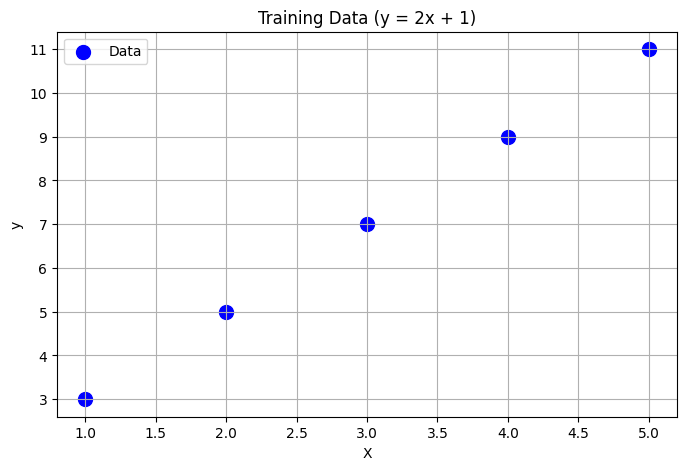

In [50]:
# 데이터 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y.numpy(), s=100, c='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data (y = 2x + 1)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: 모델 정의

In [52]:
# 선형 모델 정의 (y = wx + b)
# nn.Linear(입력 차원, 출력 차원)
model = nn.Linear(1, 1)

# 초기 가중치와 편향 확인
print(f"초기 가중치 (w): {model.weight.item():.4f}")
print(f"초기 편향 (b): {model.bias.item():.4f}")

초기 가중치 (w): 0.9635
초기 편향 (b): -0.5885


### Step 3: 손실 함수 & 옵티마이저 정의

In [65]:
# 손실 함수: MSE (Mean Squared Error)
criterion = nn.MSELoss()

# 옵티마이저: SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("손실 함수: MSE (평균 제곱 오차)")
print("옵티마이저: SGD (학습률 = 0.01)")

손실 함수: MSE (평균 제곱 오차)
옵티마이저: SGD (학습률 = 0.01)


### Step 4: 학습 루프

In [66]:
# 학습 기록
losses = []
epochs = 1000

for epoch in range(epochs):
    # 1. 예측 (Forward)
    pred = model(X)

    # 2. 손실 계산
    loss = criterion(pred, y)

    # 3. 기울기 초기화
    optimizer.zero_grad()

    # 4. 역전파 (Backward)
    loss.backward()

    # 5. 가중치 업데이트
    optimizer.step()

    # 손실 기록
    losses.append(loss.item())

    # 100번마다 출력
    if (epoch + 1) % 100 == 0:
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [100/1000], Loss: 0.000000
Epoch [200/1000], Loss: 0.000000
Epoch [300/1000], Loss: 0.000000
Epoch [400/1000], Loss: 0.000000
Epoch [500/1000], Loss: 0.000000
Epoch [600/1000], Loss: 0.000000
Epoch [700/1000], Loss: 0.000000
Epoch [800/1000], Loss: 0.000000
Epoch [900/1000], Loss: 0.000000
Epoch [1000/1000], Loss: 0.000000


### Step 5: 결과 확인

In [67]:
# 학습된 가중치와 편향 확인
learned_w = model.weight.item()
learned_b = model.bias.item()

print(f"\n학습된 가중치 (w): {learned_w:.4f} (목표: 2)")
print(f"학습된 편향 (b): {learned_b:.4f} (목표: 1)")
print(f"\n학습된 모델: y = {learned_w:.2f}x + {learned_b:.2f}")


학습된 가중치 (w): 2.0000 (목표: 2)
학습된 편향 (b): 0.9999 (목표: 1)

학습된 모델: y = 2.00x + 1.00


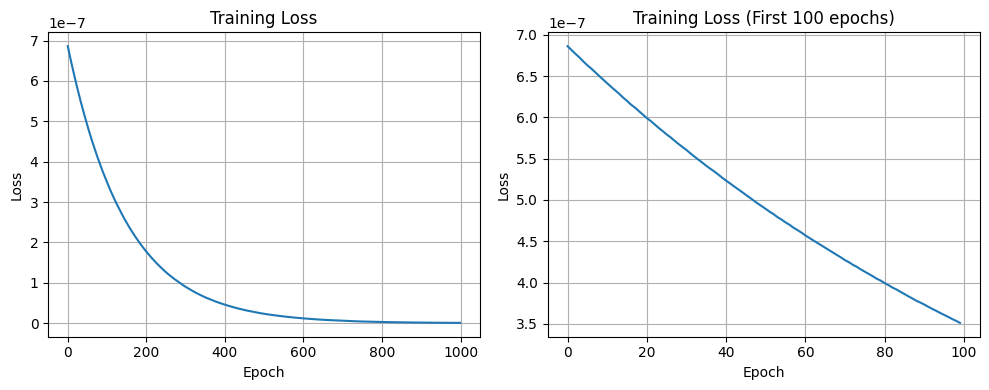

In [68]:
# 손실 변화 시각화
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses[:100])  # 처음 100 epoch
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (First 100 epochs)')
plt.grid(True)

plt.tight_layout()
plt.show()

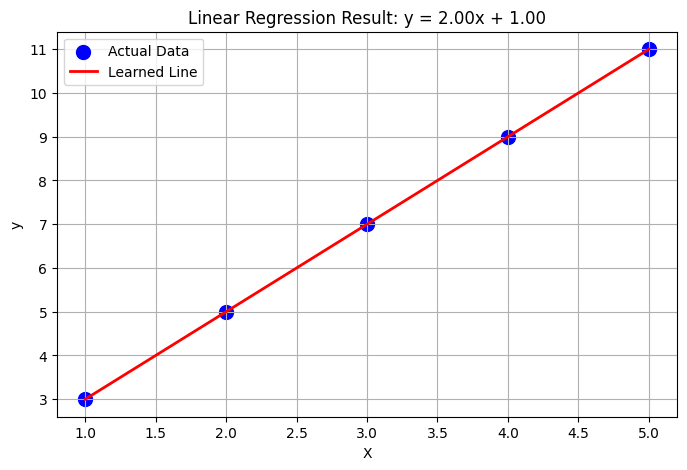

In [69]:
# 예측 결과 시각화
with torch.no_grad():  # 기울기 계산 비활성화
    predictions = model(X)

plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y.numpy(), s=100, c='blue', label='Actual Data')
plt.plot(X.numpy(), predictions.numpy(), 'r-', linewidth=2, label='Learned Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression Result: y = {learned_w:.2f}x + {learned_b:.2f}')
plt.legend()
plt.grid(True)
plt.show()

### Step 6: 새로운 데이터로 예측

In [70]:
# 새로운 데이터로 예측
new_X = torch.tensor([[6.], [7.], [10.]])

with torch.no_grad():
    new_predictions = model(new_X)

print("새로운 데이터 예측:")
for x, pred in zip(new_X, new_predictions):
    actual = 2 * x.item() + 1
    print(f"  x = {x.item():.0f}: 예측 = {pred.item():.2f}, 실제 = {actual:.0f}")

새로운 데이터 예측:
  x = 6: 예측 = 13.00, 실제 = 13
  x = 7: 예측 = 15.00, 실제 = 15
  x = 10: 예측 = 21.00, 실제 = 21


---
## 7. 헬스케어 예제: 환자 데이터 예측

In [71]:
# 헬스케어 예제: 나이와 혈압의 관계 예측
# 가상 데이터: 나이가 증가하면 수축기 혈압도 증가하는 경향

torch.manual_seed(42)

# 데이터 생성 (나이: 30~70세, 혈압 = 80 + 0.8*나이 + 노이즈)
ages = torch.linspace(30, 70, 20).reshape(-1, 1)
blood_pressure = 80 + 0.8 * ages + torch.randn(20, 1) * 5

print(f"데이터 수: {len(ages)}")
print(f"나이 범위: {ages.min().item():.0f} ~ {ages.max().item():.0f}세")
print(f"혈압 범위: {blood_pressure.min().item():.0f} ~ {blood_pressure.max().item():.0f} mmHg")

데이터 수: 20
나이 범위: 30 ~ 70세
혈압 범위: 99 ~ 138 mmHg


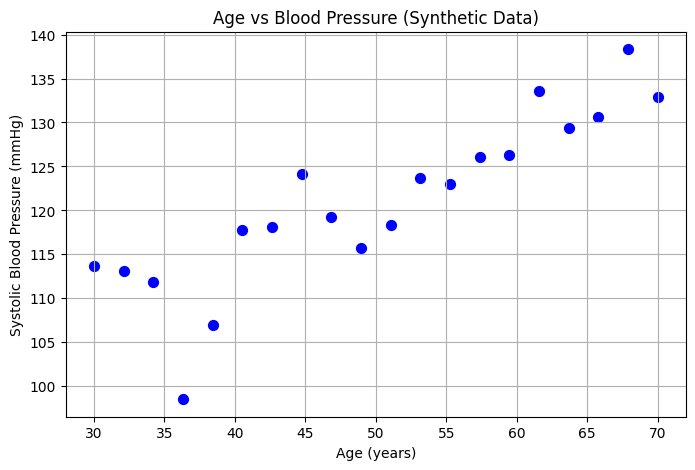

In [72]:
# 데이터 시각화
plt.figure(figsize=(8, 5))
plt.scatter(ages.numpy(), blood_pressure.numpy(), s=50, c='blue')
plt.xlabel('Age (years)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Age vs Blood Pressure (Synthetic Data)')
plt.grid(True)
plt.show()

In [ ]:
# 모델 학습
model_bp = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_bp.parameters(), lr=0.0001)  # 작은 학습률

losses = []

for epoch in range(2000):
    pred = model_bp(ages)
    loss = criterion(pred, blood_pressure)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/2000], Loss: {loss.item():.4f}")

print(f"\n학습된 모델: 혈압 = {model_bp.weight.item():.2f} × 나이 + {model_bp.bias.item():.2f}")

In [ ]:
# 예측 결과 시각화
with torch.no_grad():
    predictions = model_bp(ages)

plt.figure(figsize=(8, 5))
plt.scatter(ages.numpy(), blood_pressure.numpy(), s=50, c='blue', label='Actual')
plt.plot(ages.numpy(), predictions.numpy(), 'r-', linewidth=2, label='Predicted')
plt.xlabel('Age (years)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Blood Pressure Prediction Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 새 환자의 혈압 예측
new_ages = torch.tensor([[45.], [55.], [65.]])

with torch.no_grad():
    new_predictions = model_bp(new_ages)

print("\n환자 혈압 예측:")
for age, pred in zip(new_ages, new_predictions):
    print(f"  {age.item():.0f}세 환자: 예측 수축기 혈압 = {pred.item():.1f} mmHg")

---
## 정리

이번 실습에서 배운 내용:

1. **PyTorch**: Facebook이 만든 딥러닝 프레임워크, Python 친화적
2. **Tensor**: 다차원 배열, 딥러닝의 기본 데이터 단위
3. **Tensor 연산**: 기본 산술, 행렬 곱셈, Shape 변경
4. **GPU 가속**: `.to(device)`로 쉽게 GPU 활용
5. **Autograd**: 자동 미분으로 기울기 계산
6. **학습 루프**: 예측 → 손실 → backward → 업데이트

### 다음 시간
다층 퍼셉트론(MLP)을 PyTorch로 구현해봅니다!